

### Loading the data set - country-income

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('country-income.csv')
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### Checking counts of missing values

We also count missing values by below code in any data set

In [ ]:
print('Missing values in columns:')
for col in df.columns:
    print('\t%s:%d' %(col,df[col].isna().sum()))

Missing values in columns:
	Region:0
	Age:1
	Income:1
	Online Shopper:0


### Replacing NaN with mean

As we can see, only two columns having missing values, so we replace them with mean.

In [ ]:
df1 = df.fillna({'Age':df.Age.mean(),'Income':df.Income.mean()})
df1

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


### One hot encoding - Converting Categorical to numeric labels

We use `sklearn` for converting Categorical labels to numeric labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df1['Online Shopper'] = le.fit_transform(df1['Online Shopper'])
df1

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,0
1,Brazil,32.000000,57600.000000,1
2,USA,35.000000,64800.000000,0
3,Brazil,43.000000,73200.000000,0
4,USA,45.000000,76533.333333,1
5,India,40.000000,69600.000000,1
6,Brazil,43.777778,62400.000000,0
7,India,53.000000,94800.000000,1
8,USA,55.000000,99600.000000,0
9,India,42.000000,80400.000000,1


### Resulting dataset

In [ ]:
Resulting_dataset = df1.drop(['Region'],axis=1)
Resulting_dataset

,Age,Income,Online Shopper
0,49.000000,86400.000000,0
1,32.000000,57600.000000,1
2,35.000000,64800.000000,0
3,43.000000,73200.000000,0
4,45.000000,76533.333333,1
5,40.000000,69600.000000,1
6,43.777778,62400.000000,0
7,53.000000,94800.000000,1
8,55.000000,99600.000000,0
9,42.000000,80400.000000,1


# Answer 5

### Loading the data set - Shoesize

In [ ]:
Data = pd.read_csv('shoesize.csv')
Data

,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0
2,3,F,7.0,60.0
3,4,F,8.0,60.0
4,5,F,8.0,60.0
...,...,...,...,...
403,404,M,13.0,78.0
404,405,M,13.0,78.0
405,406,M,14.0,78.0
406,407,M,15.0,80.0


### Filtering Female dataset

In [ ]:
Female_Data = Data.loc[Data['Gender']=='F']
Female_Data

,Index,Gender,Size,Height
0,1,F,5.5,60.0
1,2,F,6.0,60.0
2,3,F,7.0,60.0
3,4,F,8.0,60.0
4,5,F,8.0,60.0
...,...,...,...,...
182,183,F,10.0,72.0
183,184,F,11.0,72.0
184,185,F,11.0,72.0
185,186,F,10.0,74.0


### Plotting scatterplot for female

<AxesSubplot:xlabel='Size', ylabel='Height'>

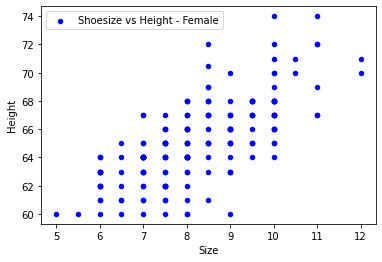

In [ ]:
Female_Data.plot.scatter(x='Size',y='Height',color = 'b', label='Shoesize vs Height - Female')

There is a strong positive correlation between Shoesize & height. It means one variable strongly implies the other variable. If one increase then other variable also increases and we can easily make the prediction that predict `y=height` when `x (shoesize) ` is 11

### Filtering Male dataset

In [ ]:
Male_Data = Data.loc[Data['Gender']=='M']
Male_Data

,Index,Gender,Size,Height
187,188,M,10.5,63.0
188,189,M,9.0,63.0
189,190,M,7.5,64.0
190,191,M,8.0,64.0
191,192,M,10.0,64.0
...,...,...,...,...
403,404,M,13.0,78.0
404,405,M,13.0,78.0
405,406,M,14.0,78.0
406,407,M,15.0,80.0


### Plotting scatterplot for Male

<AxesSubplot:xlabel='Size', ylabel='Height'>

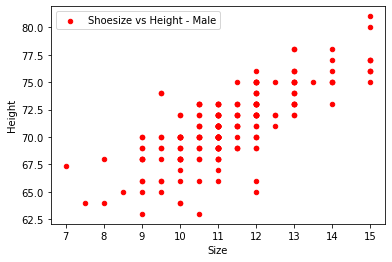

In [ ]:
Male_Data.plot.scatter(x='Size',y='Height',color = 'r', label='Shoesize vs Height - Male')

There is a strong positive correlation between Shoesize & height. It means one variable strongly implies the other variable. If one increase then other variable also increases and we can easily make the prediction that predict `y=height` when `x (shoesize) ` is 11

### Female pearson correlation coefficient

In [ ]:
x = Female_Data['Size']
y = Female_Data['Height']

Pearson_Coefficient, r_value = pearsonr(x,y)
print('Pearson Coefficient for female : %.3f ' % Pearson_Coefficient)

Pearson Coefficient for female : 0.708 


As Coefficient > 0, both attributes are positively correlated. If one increases, other also increases.

### Male pearson correlation coefficient

In [ ]:
x1 = Male_Data['Size']
y1 = Male_Data['Height']

Pearson_Coefficient, r_value = pearsonr(x1,y1)
print('Pearson Coefficient for Male : %.3f ' % Pearson_Coefficient)

Pearson Coefficient for Male : 0.768 


As Coefficient > 0, both attributes are positively correlated. If one increases, other also increases.

### Pearson coefficients ( Shoe size vs Height)

- Female = 0.708
- Male = 0.768

# Answer 6

### Loading breast cancer dataset

In [ ]:
Breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
Breast_cancer

Breast_cancer.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

Data2 = Breast_cancer.drop(['Sample code'],axis=1)
Data2

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


### Dropping class column

In [ ]:
Data3 = Data2.drop(['Class'],axis=1)
Data3

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


### Replacing NaN with median

In [ ]:
Data3 = Data3.replace('?',np.NaN)
Data3 = Data3.fillna(Data3.median())
Data3

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


### Converting object into float

In [ ]:
Data3['Bare Nuclei'] = pd.to_numeric(Data3['Bare Nuclei'])
Data3

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


### Normalization prior to PCA

The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [ ]:
Z = (Data3-Data3.mean())/Data3.std()
Z

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.798376,-0.179534,-0.283909,-0.343666
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.410392,-0.179534,-0.611387,-0.343666
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.141800,-0.179534,1.353485,-0.343666
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666
...,...,...,...,...,...,...,...,...,...
694,-0.503505,-0.699494,-0.742767,-0.632794,-0.097558,-0.410392,-0.999756,-0.611387,-0.343666
695,-0.858651,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.999756,-0.611387,-0.343666
696,0.206788,2.249915,2.285586,0.067638,1.708882,-0.134296,1.871021,2.335921,0.239398
697,-0.148359,1.594490,0.939651,0.417854,-0.097558,0.141800,2.691243,1.026006,-0.343666


In [ ]:
Final_data = np.array(Z)
Final_data

array([[ 0.20678764, -0.69949416, -0.74276716, ..., -0.17953357,
        -0.61138724, -0.34366569],
       [ 0.20678764,  0.28364207,  0.26668374, ..., -0.17953357,
        -0.28390856, -0.34366569],
       [-0.50350505, -0.69949416, -0.74276716, ..., -0.17953357,
        -0.61138724, -0.34366569],
       ...,
       [ 0.20678764,  2.24991453,  2.28558552, ...,  1.87102143,
         2.33592089,  0.23939819],
       [-0.1483587 ,  1.59449037,  0.939651  , ...,  2.69124342,
         1.02600617, -0.34366569],
       [-0.1483587 ,  1.59449037,  1.61261826, ...,  2.69124342,
         0.37104881, -0.34366569]])

### Principal component analysis (PCA)

Principal component analysis (PCA) is a classical method for reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes (also known as components) created by PCA have the following properties: (1) they are linear combinations of the original attributes, (2) they are orthogonal (perpendicular) to each other, and (3) they capture the maximum amount of variation in the data.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca

PCA(n_components=2)

In [ ]:
pca.fit(Final_data)
projected = pca.transform(Final_data)
projected

array([[-1.45517834, -0.11013157],
       [ 1.46523002, -0.54450361],
       [-1.57818131, -0.07480003],
       ...,
       [ 3.82262141, -0.18033645],
       [ 2.26785798, -1.1126384 ],
       [ 2.66254654, -1.19638528]])

### Explained_variance_ratio

In [ ]:
pca.explained_variance_ratio_

array([0.65445704, 0.0860859 ])

Together, the first two principal components contains 74.04% of the information. The first principal contains 65.4% of the variance and second principal contains 8.6% of the variance. Rest of the principal components contains rest of the variance of the dataset.

### Scatter plot 

Text(0.5, 0, 'Second principal component')

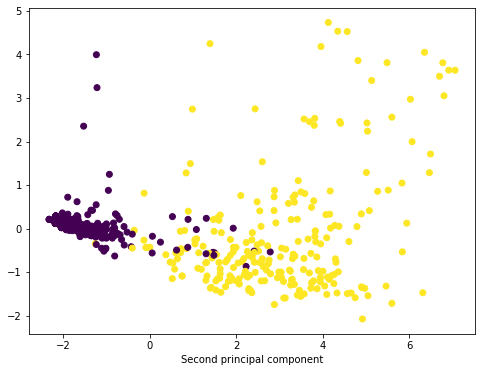

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(projected[:,0],projected[:,1],c = Data2['Class'])
plt.xlabel('First principal component')
plt.xlabel('Second principal component')

From this scatterplot, Majority of groupA (Yellow) data values are on the right hand side of this plot and majority of groupB (Blue) data values are on left hand side of plot. First principal component is very effective in seperating groupA and groupB data. Only few data values of groupA are misclassified and left hand side of the 0 line and only few data values of groupB are misclassified and right hand side of the 0 line.

# Part 2

## Answer 1
- Loading graduation_rate dataset

In [ ]:
import pandas as pd

Data5 = pd.read_csv('graduation_rate.csv')
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

Data5['parental level of education'] = pd.Categorical(Data5['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)
Data5


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4
...,...,...,...,...,...,...,...
995,30,1967,high school,49002,3.8,3.5,6
996,28,2066,some college,83438,3.9,3.5,4
997,27,1971,high school,68577,3.6,3.7,5
998,30,2057,some college,56876,3.8,3.6,3


### Summary statsitics

In [ ]:
Data5.describe()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,28.557000,1997.803000,66564.905000,3.712900,3.36990,4.992000
std,2.776051,142.736442,19451.865744,0.283415,0.23622,1.403533
min,19.000000,1498.000000,1882.000000,2.700000,2.70000,3.000000
25%,27.000000,1907.750000,53443.000000,3.500000,3.20000,4.000000
50%,29.000000,1999.000000,65441.000000,3.800000,3.40000,5.000000
75%,30.000000,2092.250000,79845.250000,4.000000,3.50000,6.000000
max,36.000000,2397.000000,120391.000000,4.000000,4.00000,10.000000


From summary statistic distribution, we can see that mean of ACT composite score and SAT total score are 28.55 and 1997.80 respectively. We can also extracts insight related to 25th,50th & 75th quantiles. Standard deviation and range can also be seen from summary statistics. 

### Correlation

In [ ]:
Data6 = Data5.drop(['parental income','high school gpa','college gpa','years to graduate','parental level of education'],axis=1)
Data6.corr()

,ACT composite score,SAT total score
ACT composite score,1.000000,0.885884
SAT total score,0.885884,1.000000


### Kind of relationship

As coefficient > 0, ACT composite score and SAT total score both are positively correlated. We can see there relationship by visualising heatmap and scatterplot.

### Heatmap visualisation

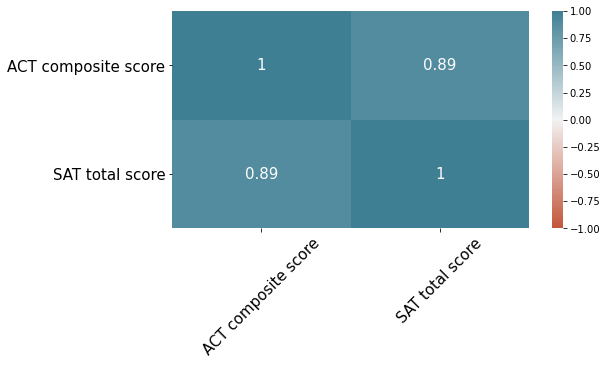

In [ ]:
import seaborn as sns 
fig,ax = plt.subplots(1,1, figsize=(8,4))
sns.heatmap(Data6.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

### Scatterplot visualisation

<AxesSubplot:xlabel='ACT composite score', ylabel='SAT total score'>

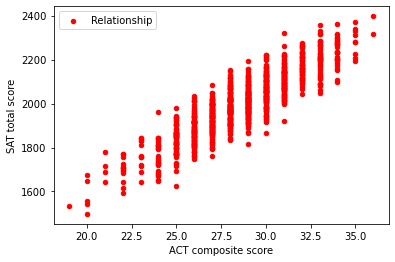

In [ ]:
Data6.plot.scatter(x='ACT composite score',y='SAT total score',color = 'r', label='Relationship')

There is a strong positive correlation between ACT composite score and SAT total score. It means one variable strongly implies the other variable. If one increase then other variable also increases.

# Answer 2

Relationship between parental level of education and parental income

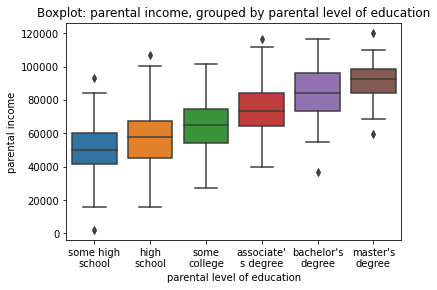

In [ ]:
mx = sns.boxplot(x='parental level of education', y='parental income', data=Data5)
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks 
import textwrap
mx.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in mx.get_xticklabels()])

plt.show()

### Relationship between parental level of education and parental income

From this boxplot, More the education, more is the income. It means that parental income is depend on parental level of education. We can see that as level of education increases, median of parental income also increasing. Master's degree level is having a minimum income of 66000 whereas minimum income of some high school is below 20000.


### Filtering master's degree as data required for Outliers

In [ ]:
Data7 = Data5.loc[Data5['parental level of education'] == "master's degree"]
Data7

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
27,28,2058,master's degree,96573,3.9,3.6,4
37,34,2363,master's degree,90775,4.0,3.6,4
65,32,2161,master's degree,75974,4.0,3.8,3
99,30,2223,master's degree,85135,4.0,3.8,3
...,...,...,...,...,...,...,...
912,31,2078,master's degree,83814,3.9,3.5,4
927,33,2330,master's degree,92185,4.0,3.8,4
929,35,2338,master's degree,79398,4.0,3.7,4
964,27,1999,master's degree,93314,3.7,3.3,5


### Selecting two columns as data required for Outliers

In [ ]:
Data8 = Data7[["parental level of education","parental income"]]
Data8

,parental level of education,parental income
0,master's degree,94873
27,master's degree,96573
37,master's degree,90775
65,master's degree,75974
99,master's degree,85135
...,...,...
912,master's degree,83814
927,master's degree,92185
929,master's degree,79398
964,master's degree,93314


### Detecting outliers using Interquantiles range (IQR)'

There are two methods of detecting outliers. We can do this by normalisation and Interquantile method. This time we are using IQR method for capturing outliers.

In [ ]:
quantile1,quantile3 = np.percentile(Data8['parental income'],[25,75])
print('Quantiles =',quantile1,quantile3)

IQR_value = quantile3-quantile1
print('IQR =', IQR_value)

Lower_bound_value = quantile1 - (1.5*IQR_value)
Upper_bound_value = quantile3 + (1.5*IQR_value)
print('Lower_bound_value =' , Lower_bound_value, '\n Upper_bound_value =' , Upper_bound_value)

Quantiles = 84039.0 98559.75
IQR = 14520.75
Lower_bound_value = 62257.875 
 Upper_bound_value = 120340.875


### Outliers - Table visualisation

In [ ]:
Outliers_Data = Data8[(Data8['parental income'] < 62257) | (Data8['parental income'] > 120340)]
Outliers_Data

,parental level of education,parental income
411,master's degree,120391
420,master's degree,59724


# Answer 3

### Importance of scaling

As we know, data set has some magnitudes and units. Scaling is important to standardize the independent features present in the data in a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values. Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process.

### Scaling example from manually created dataset

In [ ]:
Dict = {'Alcoholprice':[10,150,5],'Wineprice':[1.5,23.1,0.1]}
Example_Scaling = pd.DataFrame(Dict)
Example_Scaling

,Alcoholprice,Wineprice
0,10,1.5
1,150,23.1
2,5,0.1


In [ ]:
X = Example_Scaling.to_numpy()
X

array([[1.00e+01, 1.50e+00],
       [1.50e+02, 2.31e+01],
       [5.00e+00, 1.00e-01]])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.66958157, -0.63957365],
       [ 1.4135611 ,  1.41212796],
       [-0.74397953, -0.77255431]])

### Distance matrices

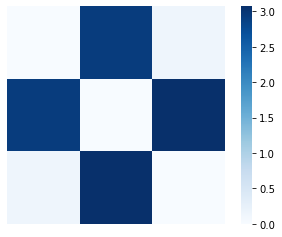

In [ ]:
from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Blues')
    
plt.show()

# Answer 4

### Interpretation of distance matrix visualisation

Color coding in distance matrices depicts the distance. From section 1, the First small block shows the distance between all objects from the objects of the first item. Second block shows the distance between first item and second item. Third block shows the distance between items of first with the items of the third. The main diagonal shows the difference between the first class, second class and the third class. Lighter color values shows the smaller distance between the items. If first block and third block has darken region, it means the distance is large.

# Answer 5

### Linspace dataset for 100 data points

In [ ]:
import numpy as np
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

,x,y,"z = f(x,y)"
0,-1.000000,-1.0,2.000000
1,-0.979798,-1.0,1.960004
2,-0.959596,-1.0,1.920824
3,-0.939394,-1.0,1.882461
4,-0.919192,-1.0,1.844914
...,...,...,...
9995,0.919192,1.0,1.844914
9996,0.939394,1.0,1.882461
9997,0.959596,1.0,1.920824
9998,0.979798,1.0,1.960004


### Heat map created through nearest neighbour interpolation

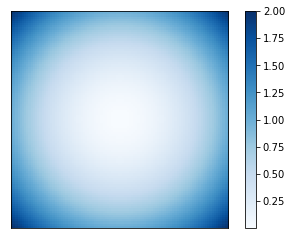

In [ ]:
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

### Interploation interpretation

Interpolation is the process of estimating unknown values that fall between known values. This method simply determines the “nearest” neighbouring pixel, and assumes the intensity value of it.

# Answer 6

### Loading Wine Data set

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### Adding target column

In [ ]:
df['target'] = pd.Series(data.target)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Frequency of each value of target

In [ ]:
print("Frequency of each value of target:")
freq_target = df['target'].value_counts()/len(df)
display(freq_target)

Frequency of each value of target:


1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

### Creating univariate summary

In [ ]:
univariate_data = df.drop(['target'],axis=1)

univariate_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Multivariate summary - Dimensionality reduction

In [ ]:
X = univariate_data.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

from sklearn.manifold import MDS
    
embedding = MDS(n_components=2)

    
Xp = embedding.fit_transform(X)
Multivariate_data = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1]})

Multivariate_data.describe()

,x,y
count,1.780000e+02,1.780000e+02
mean,-1.503167e-16,3.792222e-16
std,2.366669e+00,2.603216e+00
min,-5.695598e+00,-5.062860e+00
25%,-1.921709e+00,-2.406959e+00
50%,1.982788e-01,6.208600e-01
75%,1.970555e+00,1.870708e+00
max,6.059519e+00,6.390137e+00


### Group observations by the target feature and computing median

In [ ]:
print('Grouping bytarget and computing the median for other features:')
display(df.groupby('target').median())

Grouping bytarget and computing the median for other features:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
1,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
2,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


### Group observations by target and creating boxplot for alcohol

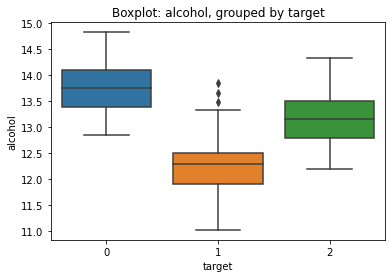

In [ ]:
ax = sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Boxplot: alcohol, grouped by target')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()

### Scatter pairplot

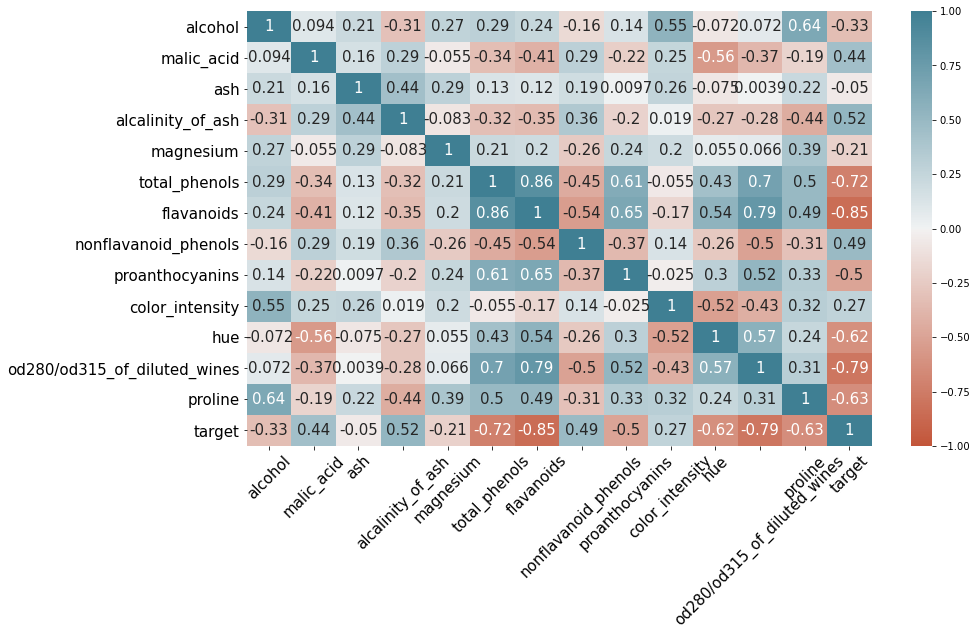

In [ ]:
import seaborn as sns 
fig,ax = plt.subplots(1,1, figsize=(14,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

### Higest correlation between flavanoids and total_phenols

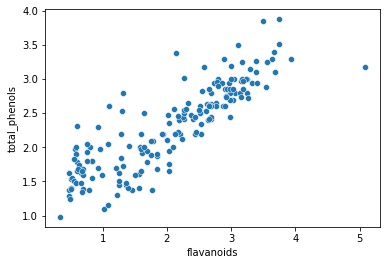

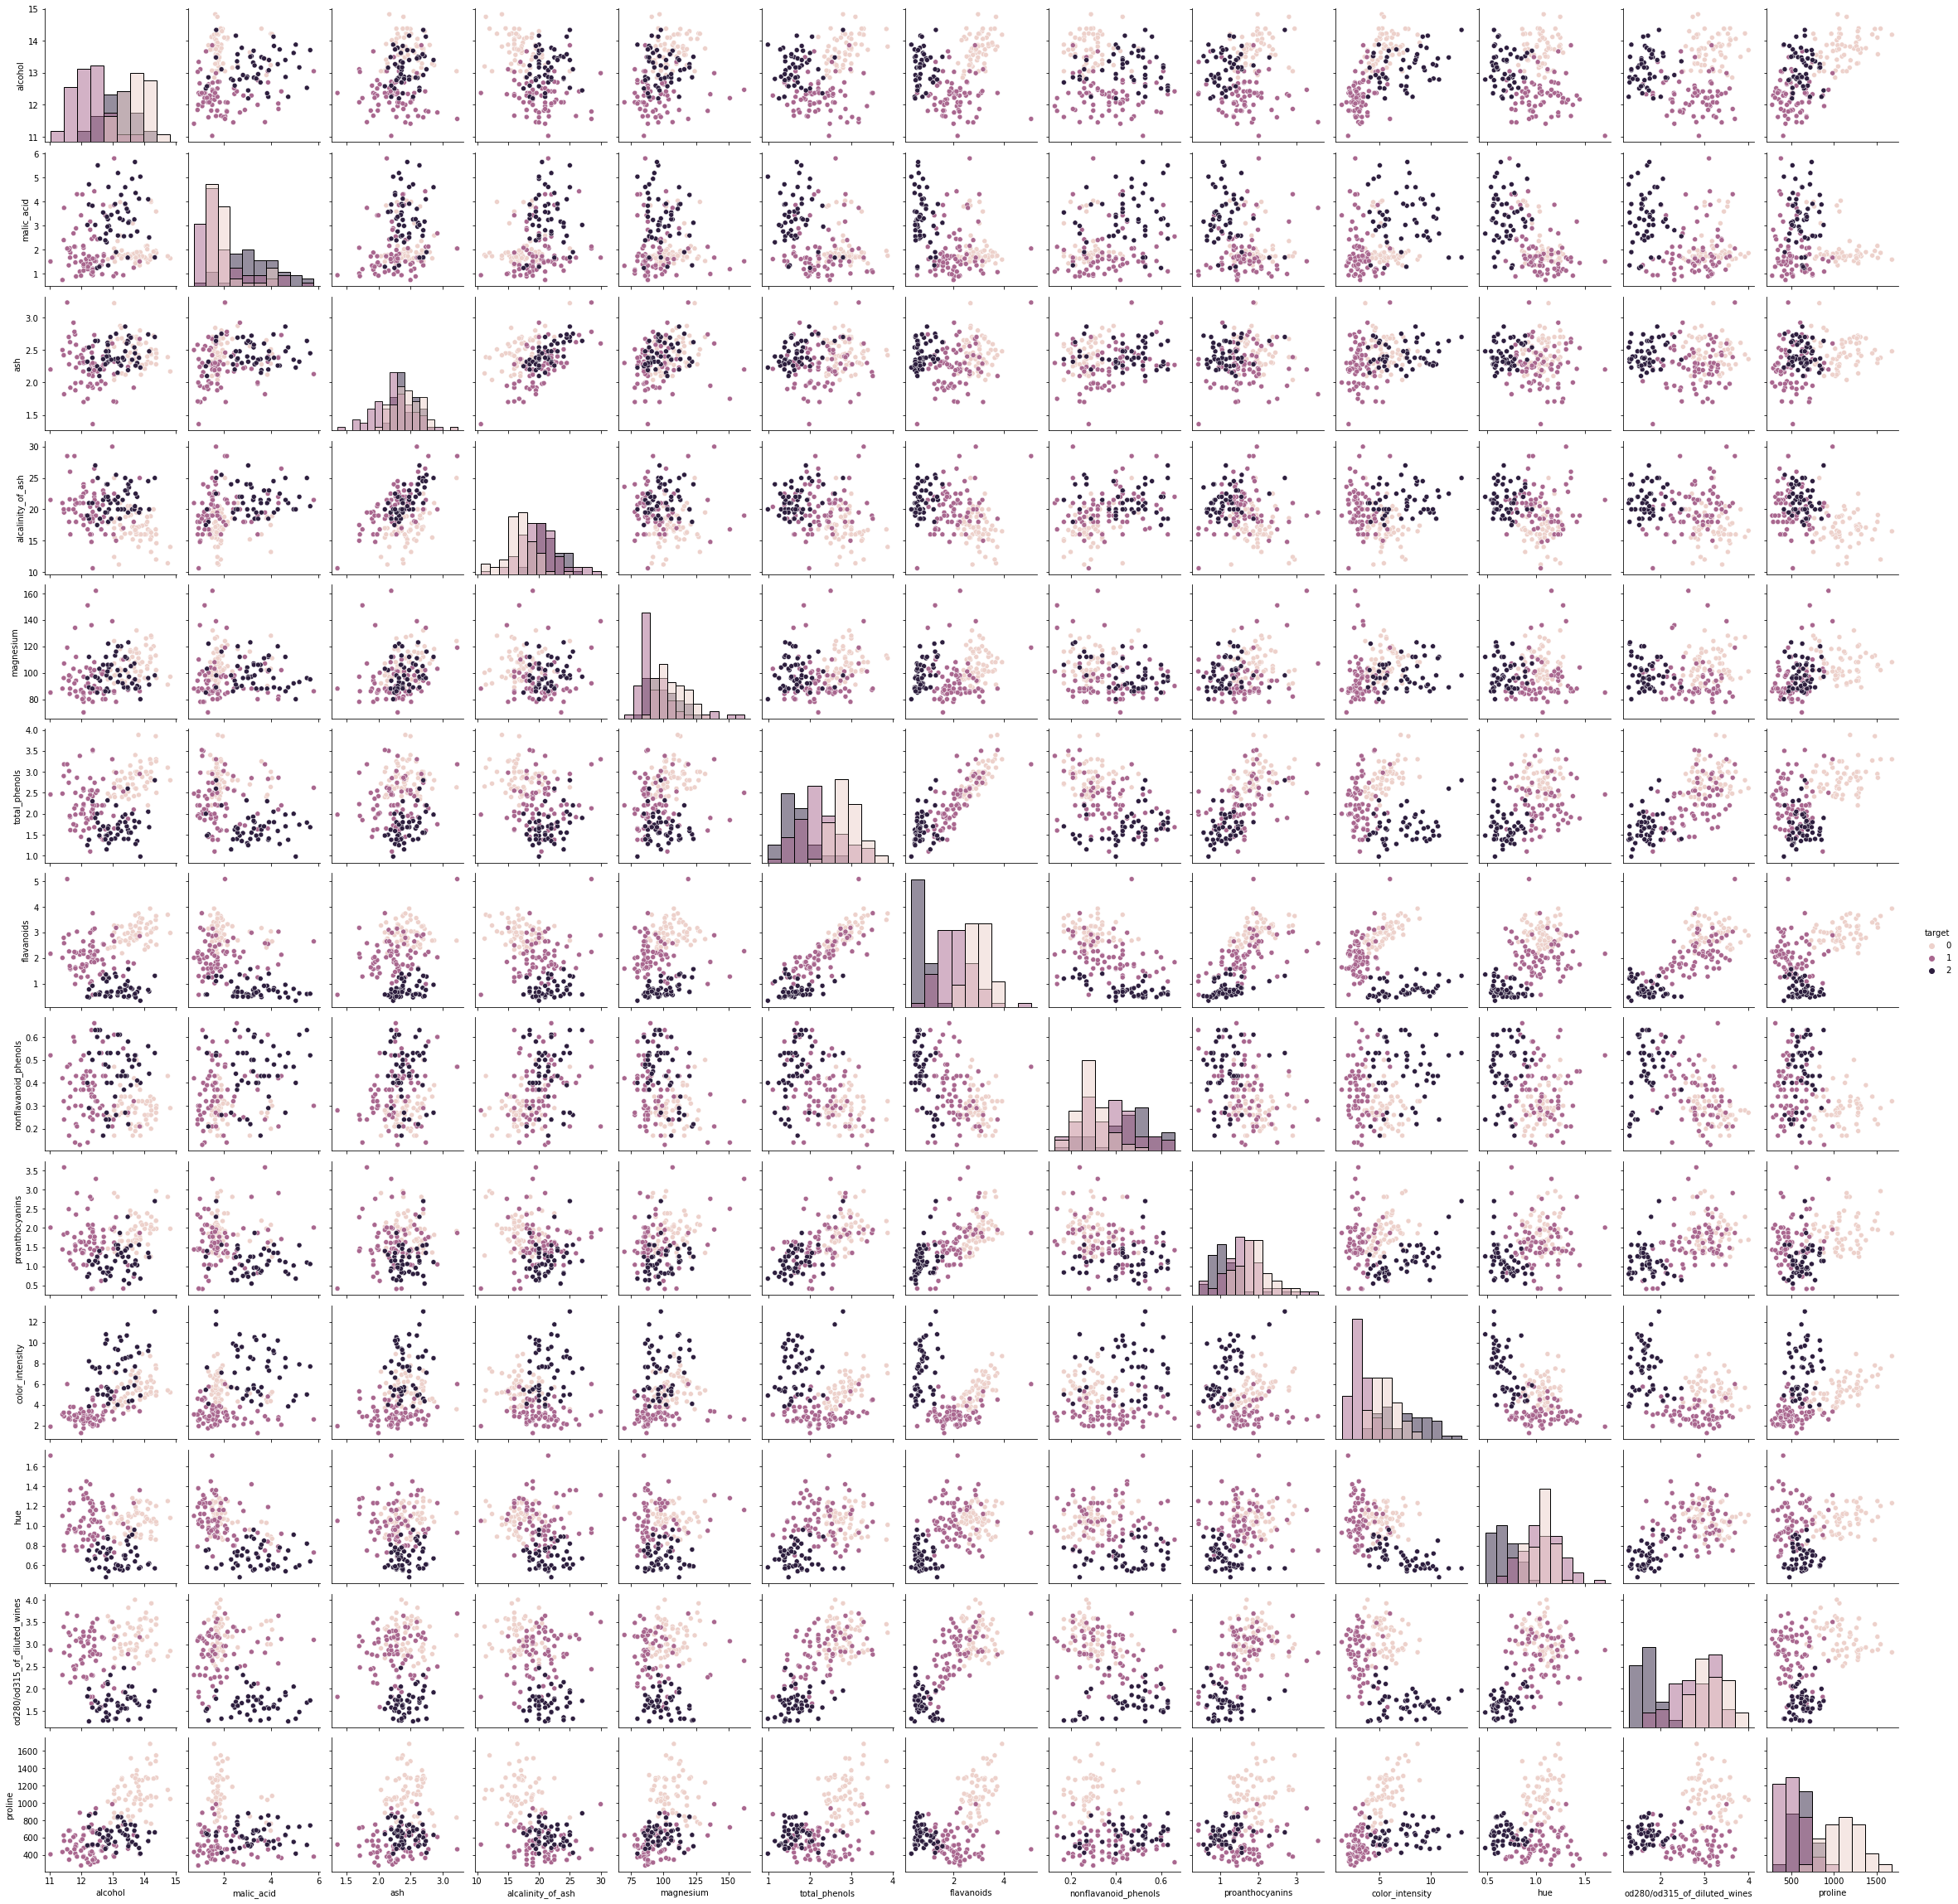

In [ ]:
sns.scatterplot(x='flavanoids', y='total_phenols', data=df)
plt.show()

sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

### Standardisation, Projection by MDS, Color coding by target

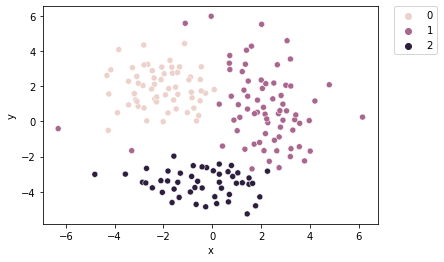

In [ ]:
X = univariate_data.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

from sklearn.manifold import MDS
    
embedding = MDS(n_components=2)

    
Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'target': df.target})

sns.scatterplot(x='x', y='y', hue='target', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Featue X and Feature y do not have any physical meaning. We use the MDS technique where dimensionality reduction for visualisation inspection only. We can get two dimensional visualisation from MDS but We can not generate any insights and analysis from MDS. For dimensionality reduction and analysis purpose, we should use the PCA.